In [14]:
import numpy as np

from icecube.photospline.glam import glam as glm
from icecube.photospline.glam.glam import grideval
from icecube.photospline import splinefitstable

import matplotlib.pyplot as plt
%matplotlib inline

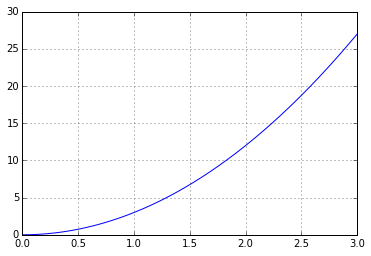

In [15]:
def y(x):
    return (3*x**2)

xAxis = np.linspace(0,3,500)
yAxis = []
for x, val in enumerate(xAxis):
    yAxis.append(y(val))
    
plt.plot(xAxis,yAxis)
plt.grid()
plt.show()
plt.close()

In [16]:
weight = np.ones(np.asarray(yAxis).shape)
order = 2
smooth = 1e-6
xKnot = np.linspace(xAxis.min()-.01,xAxis.max()+.01, 50, endpoint=True)
knots = [xKnot]
result = glm.fit(np.asarray(yAxis),weight,[xAxis],knots,order,smooth)

Calculating spline basis...
Calculating penalty matrix...
Reticulating splines...
	Processing dimension 0
Computing iteration 1 least squares solution...


In [17]:
def loadHonda(filename):
    costh, E, kaon_nue, kaon_nuebar, \
    kaon_numu, kaon_numubar, \
    pion_nue, pion_nuebar, \
    pion_numu, pion_numubar, \
    = np.loadtxt(filename,comments='#',usecols=(0,1,2,3,4,5,6,7,8,9), unpack=True)
    
    array = np.recarray(len(costh), [('cos_theta', float),
                                     ('energy', float), # in units of GeV
                                     ('kaon_nu_e', float), # in units of ????
                                     ('kaon_nu_e_bar', float),
                                     ('kaon_nu_mu', float),
                                     ('kaon_nu_mu_bar', float),
                                     ('pion_nu_e', float),
                                     ('pion_nu_e_bar', float),
                                     ('pion_nu_mu', float),
                                     ('pion_nu_mu_bar', float)])
    array.cos_theta[:] = costh
    array.energy[:] = E
    array.kaon_nu_e[:], array.kaon_nu_e_bar[:] = kaon_nue, kaon_nuebar
    array.kaon_nu_mu[:], array.kaon_nu_mu_bar[:] = kaon_numu, kaon_numubar
    array.pion_nu_e[:], array.pion_nu_e_bar[:] = pion_nue, pion_nuebar
    array.pion_nu_mu[:], array.pion_nu_mu_bar[:] = pion_numu, pion_numubar
    
    return array

path      = '/data/user/jlazar/data/analysis/'
hondaFile = 'honda_all.txt'
hondaData = loadHonda(path + hondaFile)

In [18]:
def makeFluxMatrix(flux,energy,cosTheta):
    dim1  = len(energy)
    dim2  = len(cosTheta)
    assert len(flux) == dim1*dim2
    mat   = np.zeros(shape=(dim1,dim2))
    for i in range(dim2):
        for j in range(dim1):
            mat[j][i] = flux[i*dim1 + j]
    return mat

def findFlux(matrix,en,c):
    return matrix[np.where(e==en),np.where(c==costh)]

In [24]:
def spline(flux, energy, cosTheta, order=2, smooth=1, w=None):
    mat = makeFluxMatrix(flux, energy, cosTheta)
    if w == None:
        w = np.ones(mat.shape)
    result = glm.fit(mat, w, [e,cosTh], knots, order, smooth)
    return result

In [39]:
muFluxes = ['kaon_nu_mu', 'kaon_nu_mu_bar', 'pion_nu_mu', 'pion_nu_mu_bar']

e         = hondaData.energy[:72]
cosTh     = np.linspace(-1,1,201)
knots     = [np.linspace(e[0],e[-1],50),np.linspace(cosTh[0],cosTh[-1],100)]

numPts    = 10000
eFine     = np.linspace(e[0],e[-1],numPts)
cosThFine = np.linspace(cosTh[0],cosTh[-1],numPts)

In [40]:
#results   = []

#for f in muFluxes:
#    results.append(spline(hondaData[f],e,cosTh))

In [42]:
#plt.imshow(np.log(grideval(results[0],[eFine,cosThFine])))
#plt.colorbar()
#plt.show()
#plt.imshow(np.log10(makeFluxMatrix(hondaData[muFluxes[0]],e,cosTh)),extent=[-1,1,np.log10(8.83423e+09),np.log10(57.6011)],aspect='equal')
#plt.colorbar()
#plt.show()

In [45]:
#toy = grideval(results[0],[eFine,cosThFine])
print(eFine)

[  5.76011000e+01   8.83568946e+05   1.76708029e+06 ...,   8.83246298e+09
   8.83334649e+09   8.83423000e+09]


In [56]:
toy[5000][3000]

-3.1252539674107724e-19

In [57]:
import astropy.time

ImportError: No module named astropy.time